# Importing the necessary libraries

In [1303]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

# Loading the dataset

In [1304]:
# Loading the data

df = pd.read_csv("/Users/madservices/Documents/FlatIron/dsc-data-science-env-config/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [1305]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [1306]:
# Checking for missing values 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have some missing data from the 'waterfront', 'view', and 'yr_renovated' columns.

In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Cleaning

In [1308]:
# Checking the unique values of all the columns
for val in df:
    print(df[val].value_counts())
    print()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: count, Length: 372, dtype: int64

price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.0

Now I will check each of the columns with missing values and address the issue of missing values either by dropping them or filling them with the most relevant values.

In [1309]:
df['waterfront'].unique()

array([nan,  0.,  1.])

The above code shows that the values for the waterfront column are 0 and 1 which means of a house has a waterfront its value is 1 otherwise it is 0. With this understanding I will fill the missing values with 0s.

In [1310]:
df['waterfront'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].astype('int')
# df['waterfront'] = df['waterfront'].map({1: True, 0: False})
# df['waterfront'].value_counts()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_2944/2350173875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waterfront'].fillna(0, inplace=True)


In [1311]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

According to the output of the code above the view column describes how many times a house was viewed ranging from 0 to 4. Here as well I choose to fill the nan values with the median values.

In [1312]:
median_value_view = df['view'].median()

# Replacing the non_numeric value with the median value
df['view'].fillna(median_value_view, inplace=True)

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_2944/3149036281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['view'].fillna(median_value_view, inplace=True)


In [1313]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

The 'sqft_basement' has an object data type which means it is considered as string. We need to change this ti float data type first. Then fill it with the median value as the median value is the value less affected by the outliers.

In [1314]:
# creating a variable to hold the dataframe with sqft basement with a datatype of float
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors="coerce")

# Checking column datatype
print(f"datatype for column:", df["sqft_basement"].dtype)

datatype for column: float64


In [1315]:
# Calculating the median value for the 'sqft_basement' column.
median_value_basement = df['sqft_basement'].median()

# Replacing the non_numeric value with the median value
df['sqft_basement'].fillna(0, inplace = True)
df['sqft_basement'].isnull().sum()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_2944/3380181457.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sqft_basement'].fillna(0, inplace = True)


0

Now let us check the issue of the bedrooms. As seen above there is one house with 33 bedrooms. This cannot be right because the price of the house and the total lot are of the house are not compatible with the number of bedrooms. So this is likely a typo error let us investigate it.

In [1316]:
# Checking the values in the 'bedrooms'column
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [1317]:
# Let's see closely at the 33 bedrooms entry and investigate
df[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [1318]:
# Comparing this row with the 10 bedrooms row.
df[df["bedrooms"]==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [1319]:
df.drop([15856], axis = 0, inplace=True)
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [1320]:
# check the year renovated column to learn about the values and decide what to do with the missing ones.

df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here also the column shows the year a house was renovated if it was ever renovated. 0 represents that the house was never renovated. Since the nan values dont specify any year, I assume that the houses with the nan values were never renovated and therefore replace the nan values with 0s.

In [1321]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [1322]:
# Making sure that we dont have any missing values anymore.
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1323]:
Col_to_drop = ['id', 'date', 'zipcode']
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1324]:
# Dropping the id and date columns because they are not needed anymore

df = df.drop(columns=['id', ])
df = df.drop(columns=['date'])
df = df.drop(columns=['zipcode'])


# EDA

Now that we have hundled the missing values let us now proceed to EDA

In [1325]:
df.sort_values('price')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15279,78000.0,2,1.00,780,16344,1.0,0,0.0,1,5,780,0.0,1942,0.0,47.4739,-122.280,1700,10387
465,80000.0,1,0.75,430,5050,1.0,0,0.0,2,4,430,0.0,1912,0.0,47.6499,-121.909,1200,7500
16184,81000.0,2,1.00,730,9975,1.0,0,0.0,1,5,730,0.0,1943,0.0,47.4808,-122.315,860,9000
8267,82000.0,3,1.00,860,10426,1.0,0,0.0,3,6,860,0.0,1954,0.0,47.4987,-122.341,1140,11250
2139,82500.0,2,1.00,520,22334,1.0,0,0.0,2,5,520,0.0,1951,0.0,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5350000.0,5,5.00,8000,23985,2.0,0,4.0,3,12,6720,1280.0,2009,0.0,47.6232,-122.220,4600,21750
4407,5570000.0,5,5.75,9200,35069,2.0,0,0.0,3,13,6200,3000.0,2001,0.0,47.6289,-122.233,3560,24345
9245,6890000.0,6,7.75,9890,31374,2.0,0,4.0,3,13,8860,1030.0,2001,0.0,47.6305,-122.240,4540,42730
3910,7060000.0,5,4.50,10040,37325,2.0,1,2.0,3,11,7680,2360.0,1940,2001.0,47.6500,-122.214,3930,25449



From this we can see that the cheapest house is at 78000.00 while the most expensive house is at 7700000.00

In [1326]:
# Let us see the to 10 most expensive houses
df.sort_values('price', ascending=False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,0,3.0,4,13,8570,3480.0,1910,1987.0,47.6298,-122.323,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,1,2.0,3,11,7680,2360.0,1940,2001.0,47.6500,-122.214,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,0,4.0,3,13,8860,1030.0,2001,0.0,47.6305,-122.240,4540,42730
4407,5570000.0,5,5.75,9200,35069,2.0,0,0.0,3,13,6200,3000.0,2001,0.0,47.6289,-122.233,3560,24345
1446,5350000.0,5,5.00,8000,23985,2.0,0,4.0,3,12,6720,1280.0,2009,0.0,47.6232,-122.220,4600,21750
1313,5300000.0,6,6.00,7390,24829,2.0,1,0.0,4,12,5000,2390.0,1991,0.0,47.5631,-122.210,4320,24619
1162,5110000.0,5,5.25,8010,45517,2.0,1,4.0,3,12,5990,2020.0,1999,0.0,47.6767,-122.211,3430,26788
8085,4670000.0,5,6.75,9640,13068,1.0,1,4.0,3,12,4820,4820.0,1983,2009.0,47.5570,-122.210,3270,10454
2624,4500000.0,5,5.50,6640,40014,2.0,1,4.0,3,12,6350,290.0,2004,0.0,47.7493,-122.280,3030,23408
8629,4490000.0,4,3.00,6430,27517,2.0,0,0.0,3,12,6430,0.0,2001,0.0,47.6208,-122.219,3720,14592


We see that there is one house with 33 bedrooms which needs further investigation.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

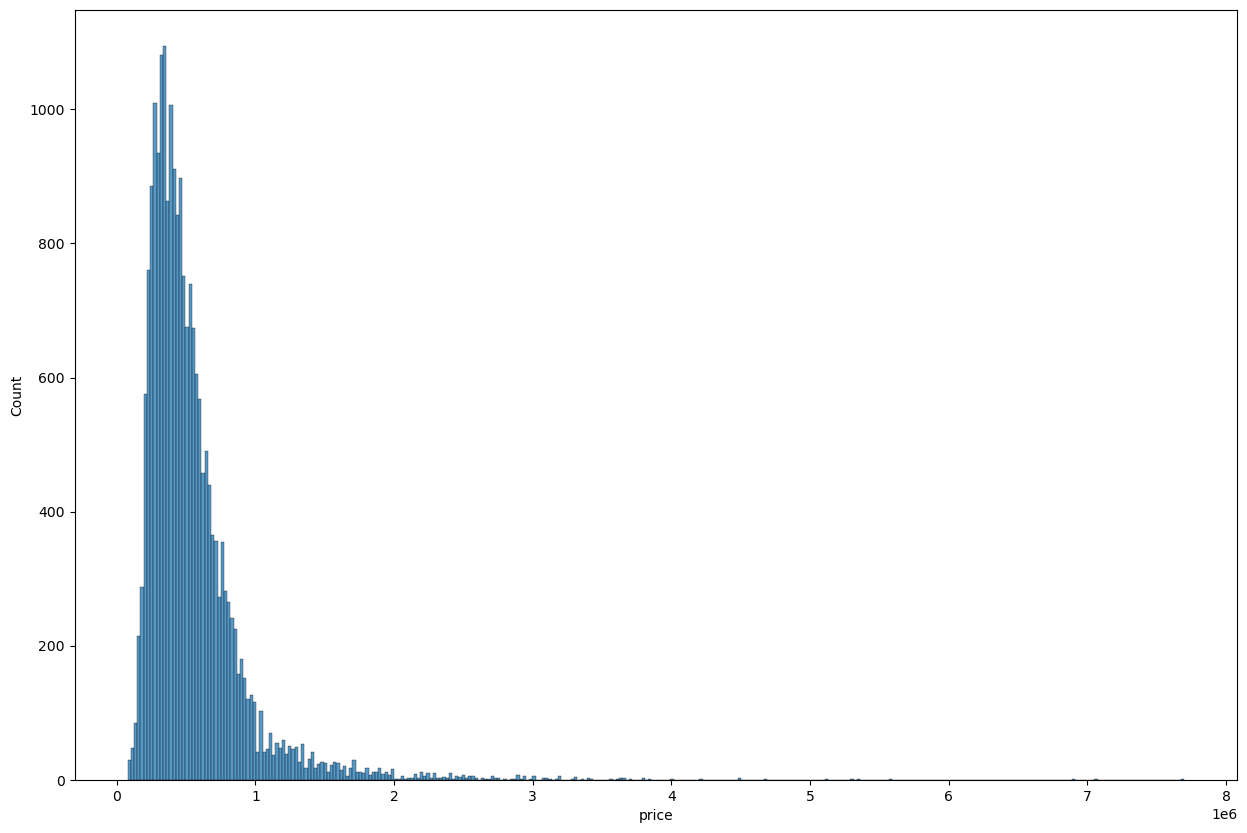

In [1327]:
plt.figure(figsize=(15,10))
sns.histplot(df['price'])


Here we observe that majority of the houses are sold at less than 1 million dollars while we have few houses fetching over 7 million dollars. Since a huge amount of the price data falls below the 1mil section the extreme ones can be treated as outliers that can affect our linear model later on.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Count'>

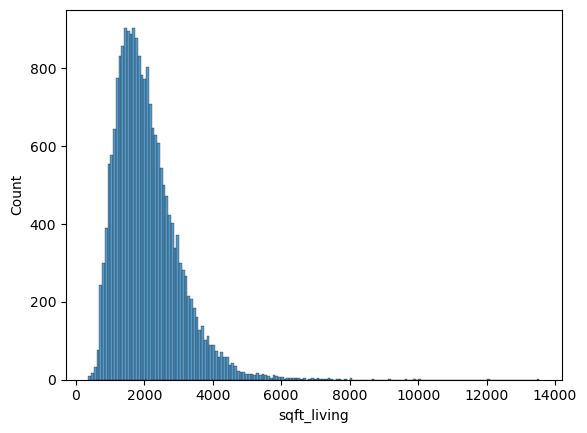

In [1328]:
# Checking the living space of the houses
sns.histplot(df['sqft_living'])

# sns.scatterplot(x='sqft_living', y='price', data=df)

# The above plot shows a positive linear relationship between the square footage of living space and the price of the house. This means that as the square footage of living space increases, the price of the house also increases.

Here as well eventhough we have houses with upto 13000 sqft living spaces, the bulk of the data rests at about the 2000 sqft mark.

<Axes: xlabel='sqft_living', ylabel='price'>

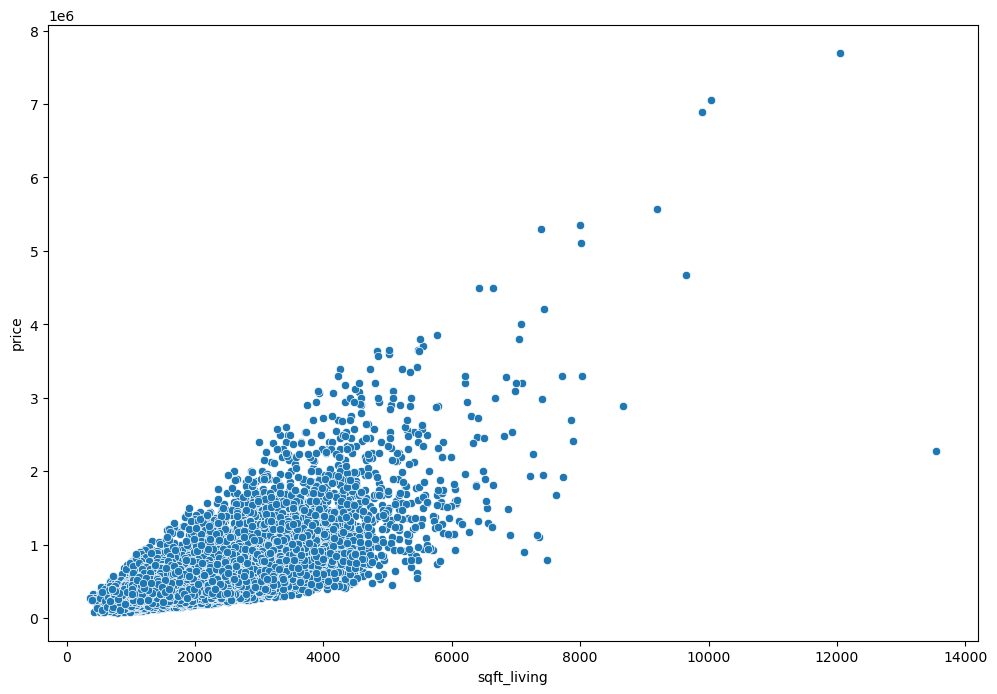

In [1329]:
# Checking the correlation between the living space and the price of the house

plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living', y='price', data=df)

This shows a strong positive correlation between the living space of a house and its price.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Count'>

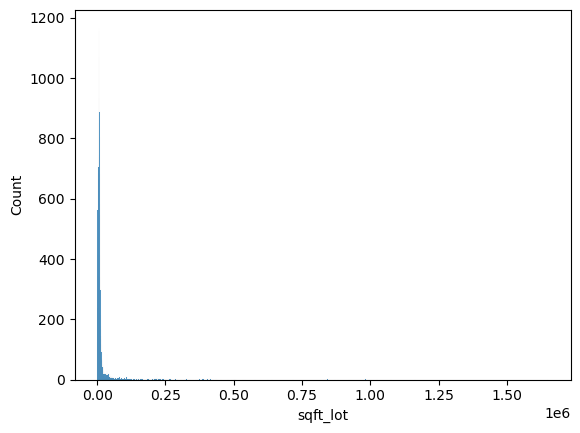

In [1330]:
# Checking the distribution of the space of the houses
sns.histplot(df['sqft_lot'])

In [1331]:
df['bedrooms'].head()

0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='Count'>

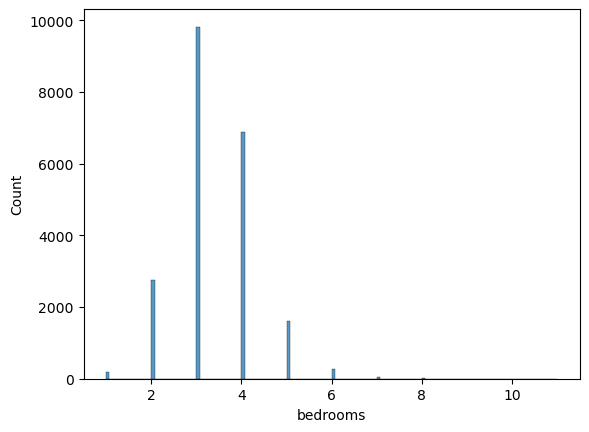

In [1332]:
# Checking the distribution of bedrooms

sns.histplot(df['bedrooms'])

It clear that most of the houses are with 3 bedrooms.

<Axes: xlabel='bedrooms', ylabel='price'>

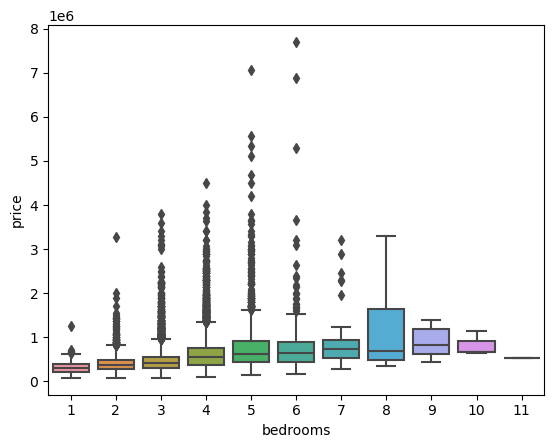

In [1333]:
# Checking if there is a relationship between number of bedrooms and house price
sns.boxplot(x='bedrooms', y='price', data=df)


As we can see from the above plot, there is a positive linear relationship between the number of bedrooms and the price of the house. This means that as the number of bedrooms increases, the price of the house also increases.


/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathrooms', ylabel='Count'>

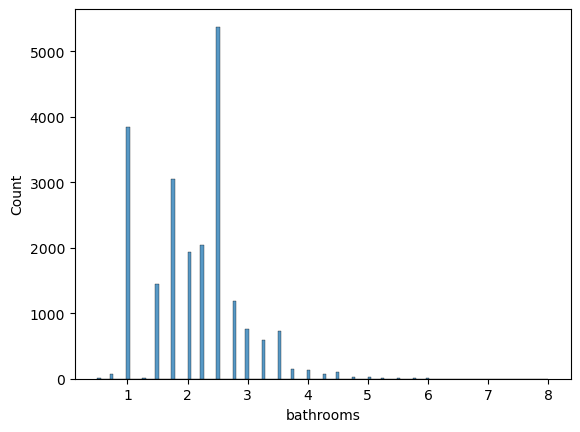

In [1334]:
# Checking the distribution of bathrooms
sns.histplot(df['bathrooms'])



<Axes: xlabel='bathrooms', ylabel='price'>

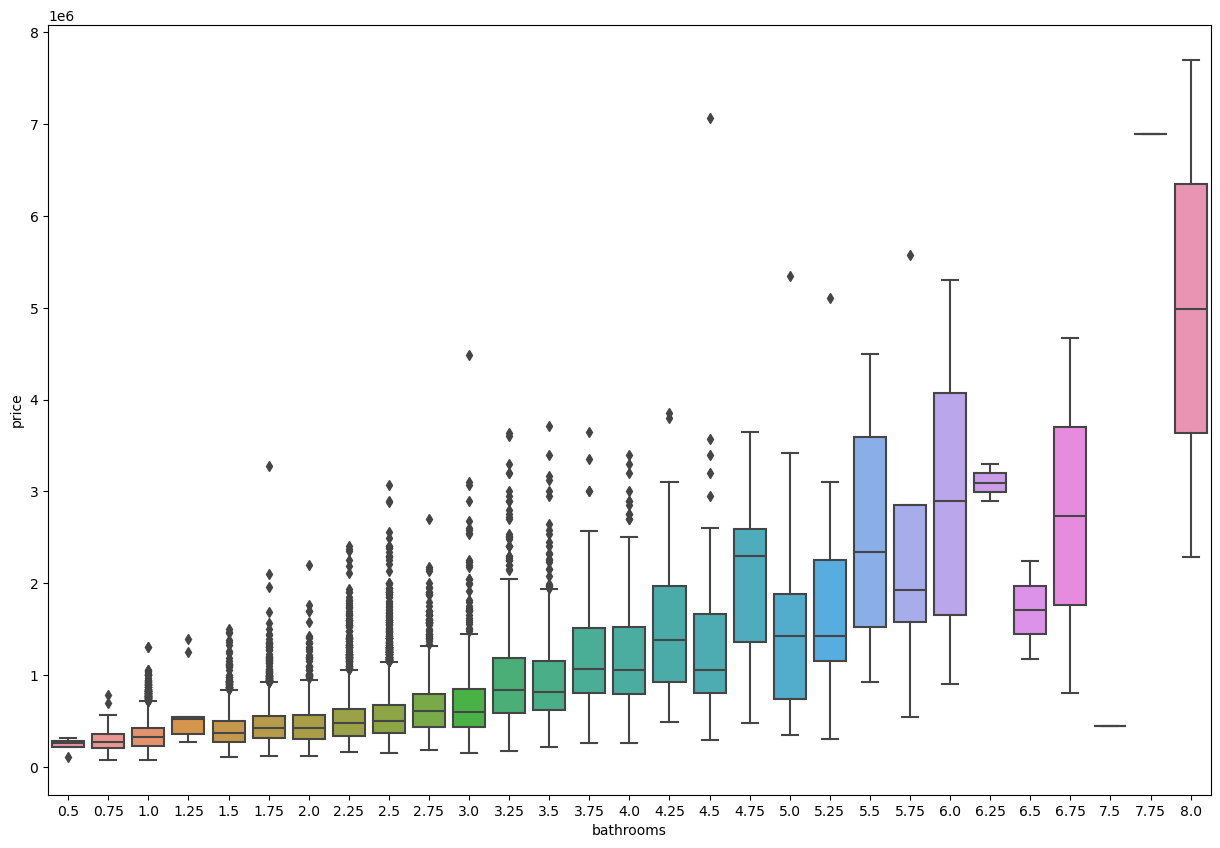

In [1335]:
# Checking if there is a relationship between number of bathrooms and house price
plt.figure(figsize=(15, 10))
sns.boxplot(x='bathrooms', y='price', data=df)

This shows that the higher the number of bathrooms the higher the house price eventhough we have outliers.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='grade', ylabel='Count'>

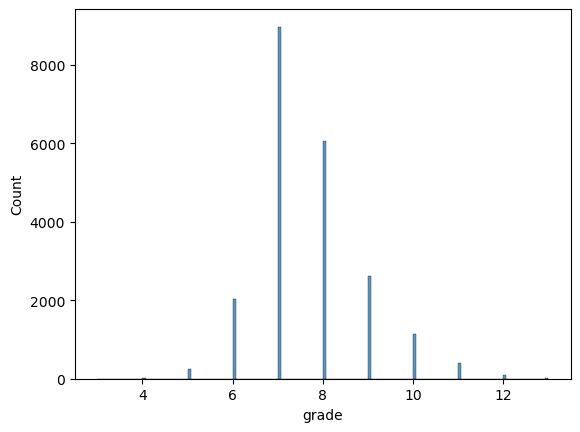

In [1336]:
# Check the grade distribution plot
sns.histplot(df['grade'])



Majority of the houses are graded between 7 and 8. 7.6 being the average

<Axes: xlabel='grade', ylabel='price'>

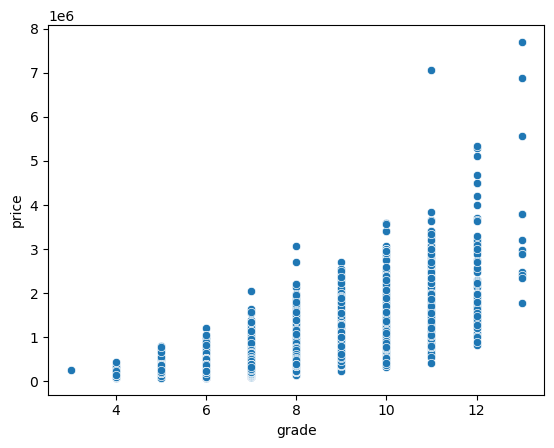

In [1337]:
# Check the relationship between the house grade and price
sns.scatterplot(x='grade', y='price', data=df)

<Axes: xlabel='waterfront', ylabel='price'>

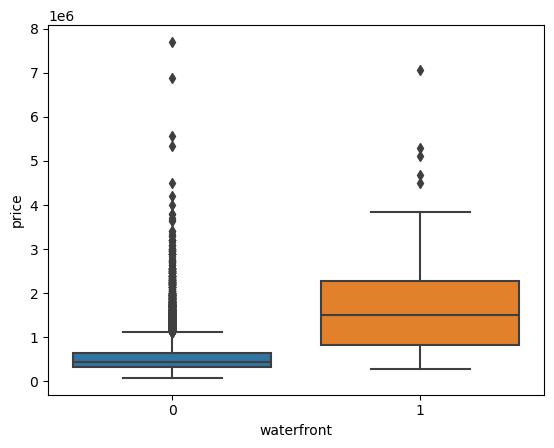

In [1338]:
# Check the relationship between the house grade and price
sns.boxplot(x='waterfront', y='price', data=df)

Houses with waterfront have hight average price than those without.

<Axes: xlabel='long', ylabel='lat'>

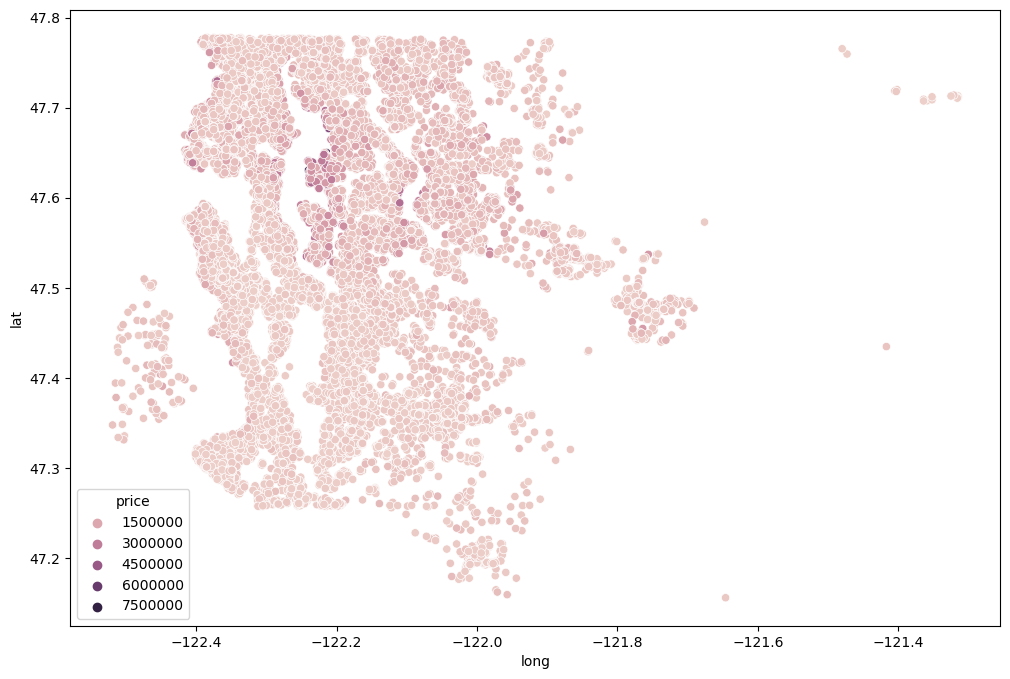

In [1339]:
# Check the relationship between the location (long, lat) of a house and the price
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

The plot clearly shows the houses near waterway fetch higher prices.

In [1340]:
corr = df.corr()
corr.shape

(18, 18)

<Axes: >

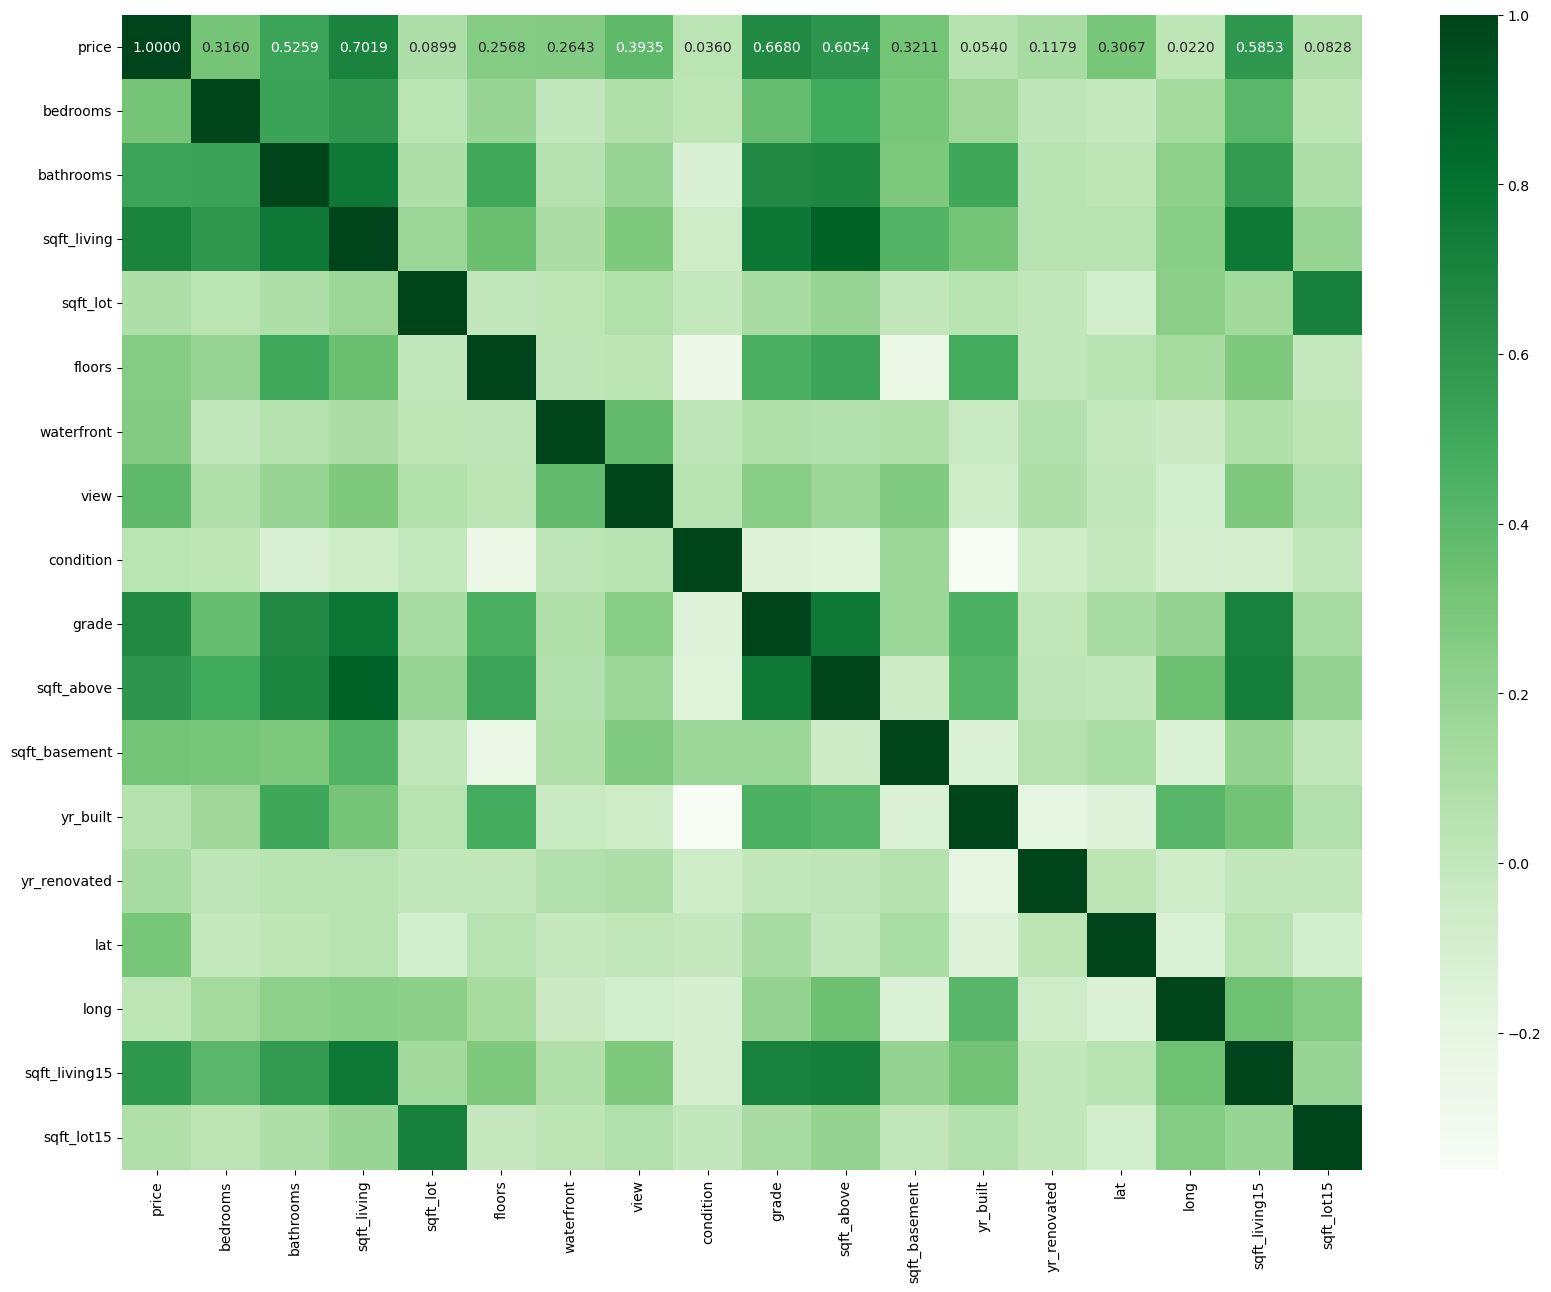

In [1341]:
# Plotting the heatmap of correlation between the features

plt.figure(figsize=(20,15))
sns.heatmap(corr, cbar=True, fmt='.4f', annot=True, annot_kws={'size':10}, cmap='Greens')


In [1342]:
# Confirming further the correlation heatmap

df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
Name: price, dtype: float64

In [1343]:
# Checking for multicollinearity among he features
def high_correlation_pairs(df, threshold=0.75):
    """
    Find pairs of variables with high correlation in the DataFrame.

    Parameters:
    - df: DataFrame containing numerical variables.
    - threshold: Threshold value for correlation. Default is 0.75.

    Returns:
    - DataFrame containing pairs of variables with correlation above the threshold.
    """
    # Calculate absolute correlations
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # Zip the variable name columns in a new column named "pairs"
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

    # Set index to pairs
    df_corr.set_index(['pairs'], inplace=True)

    # Drop level columns
    df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

    # Rename correlation column
    df_corr.columns = ['cc']

    # Drop duplicates
    df_corr.drop_duplicates(inplace=True)

    # Filter pairs with correlation above the threshold
    high_corr_pairs = df_corr[(df_corr.cc > threshold) & (df_corr.cc < 1)]

    return high_corr_pairs

high_correlation_pairs(df)

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762776
"(sqft_living, sqft_living15)",0.756400
"(grade, sqft_above)",0.756069
"(bathrooms, sqft_living)",0.755755


# Feature Selection

Based of the findings of the above observations the pairs listed show highest correlation with each other. We should drop some of the features to avoid running into multicollinearity problem with our modeling.

In [1344]:
df.drop(['sqft_above', 'yr_built', 'yr_renovated', 'grade', 'bathrooms', 'sqft_living15', 'sqft_basement'], axis=1, inplace=True)
high_correlation_pairs(df)

,cc
pairs,


# Modeling

## Model 1 : Single feature selection

In [1345]:
# Simple linear modeling using the sqft_living feature

X = df['sqft_living']
y = df['price']
simple_formula = 'y ~ X'
simple_model = ols(simple_formula, df).fit()
simple_model_summary = simple_model.summary()

print(simple_model_summary)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:37:09   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.401e+04   4410.123     -9.980      0.0

Looking at the R2 49% result reveals that this is not yet a good model. We need to fine tune our model further more.

### Model 2: Full feature selection

In [1355]:
# Full sample target variable and independent variables

X = df.drop(['price'], axis=1)
y = df['price']

In [1356]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [1357]:
# Create linear regression
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [1358]:
# Model prediction on train data
y_pred = model.predict(X_test_scaled)

In [1368]:
# Model Evaluation

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

# Calculate the RMSE value
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


# Calculate the Adjusted R2
adj_r2 = (r2 * len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)
print(f"AR2: {adj_r2}")



MSE: 61251115585.27808
MAE: 161354.69079577035
R2: 0.5324806709143306
RMSE: 247489.6272276438
AR2: 0.5327424694971984


The R2 score of 0.532 means that our model explains approximately 53.2% of the variance in the target variable. It is better than the first simple model but needs more adjustment.

Now, let's try to improve this model by using regularization techniques like Ridge and Lasso regression.

### Model 3: Specific feature selection

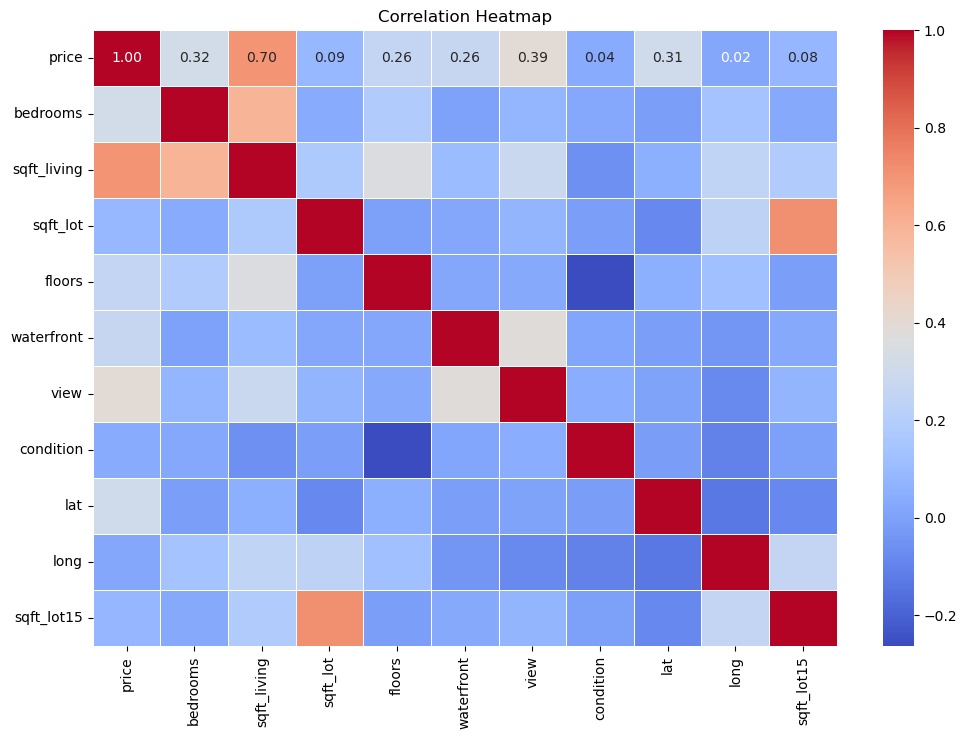

In [1370]:
# Checking the correlation heat map

# sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
# correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Checking the dataset

In [1352]:
# Checking the columns' data types
print(df.dtypes)

price          float64
bedrooms         int64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront       int64
view           float64
condition        int64
lat            float64
long           float64
sqft_lot15       int64
dtype: object


In [1353]:
# Checking the first 5 entries of the dataset
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,lat,long,sqft_lot15
0,221900.0,3,1180,5650,1.0,0,0.0,3,47.5112,-122.257,5650
1,538000.0,3,2570,7242,2.0,0,0.0,3,47.7210,-122.319,7639
2,180000.0,2,770,10000,1.0,0,0.0,3,47.7379,-122.233,8062
3,604000.0,4,1960,5000,1.0,0,0.0,5,47.5208,-122.393,5000
4,510000.0,3,1680,8080,1.0,0,0.0,3,47.6168,-122.045,7503


In [1354]:
df['id'].value_counts()

KeyError: 'id'

In [ ]:
ids = df["id"]
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0,0.0,...,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0,0.0,...,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0,0.0,...,7,1090,0.0,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0,0.0,...,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


It looks like there are some duplicates in the dataset. Need for further investigation.

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21596, dtype: bool

Here the code returns "False" and it contradicts with the above code. What could be the reason?

In [ ]:
# Check for duplicated houses 

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Get duplicates
duplicates = get_duplicates(df)
duplicates.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
#checking unique identifiers for houses. I am assuming that the 'id' column is unique, so let's check that out.
df["id"].value_counts()

id
795000620     3
8651510380    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21419, dtype: int64

I see that some IDs are used multiple times and this needs further investigation.

In [ ]:
# Investigating the 795000620 ID unique identifier. 
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250


This reveals that some houses have been sold multiple times. For instance the house with ID 795000620 has been sold 3 times over the period. This explains the repetition of some of the IDs in this dataset.

In [ ]:
# Checking how many houses have been sold multiple times.
houses_sold_more_than_1times =len(df["id"])-len(df["id"].value_counts())
houses_sold_more_than_1times

177

So in this data set there are 177 houses that have been sold more than once during the given period. This confirms that there are no duplicates in the dataset as demonstrated above.

In [ ]:
# Checking for values that look like placeholders or are exaggerated.
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')


# Apply the function to the housing dataset
extraneous_values(df)


id 
 id
795000620     0.000139
8651510380    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
                ...   
3649100387    0.000046
2767603649    0.000046
1446403617    0.000046
5602000275    0.000046
1523300157    0.000046
Name: proportion, Length: 21419, dtype: float64 

date 
 date
2014-06-23    0.006575
2014-06-26    0.006066
2014-06-25    0.006020
2014-07-08    0.005881
2015-04-27    0.005834
                ...   
2014-11-02    0.000046
2015-01-31    0.000046
2015-05-24    0.000046
2014-05-17    0.000046
2014-07-27    0.000046
Name: proportion, Length: 372, dtype: float64 

price 
 price
450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006946
              ...   
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
942000.0    0.000046
402101.0    0.000046
Name: proportion, Length: 3622, dtype: float64 

bedrooms 
 bedrooms
3     0.454899
4     0.318670
2     0.127801
5     0.074134
6 

There seems to be one problem with the "bedrooms" column as there is an entry for 33 bedrooms. In addition the "sqft_basement" column contains a non numeric value '?'.

Taking this comparison to consideration it is evident that the 33 bedrooms row is a mistake. So I chose to drop that entry from the dataset.

In [ ]:
# Confirming that I dropped wrong 33 bedrooms entry.
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [ ]:
# Adding a column "house_age" that takes the yr_built and the date and returns the difference.

df['house_age'] = df['date'].dt.year - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [ ]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [ ]:

# # Changing the datatype of the sqft_basement column to numeric
# df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Changing all the data type to float
# df['bedrooms'] = df['bedrooms'].astype(float)
# df['sqft_living'] = df['sqft_living'].astype(float)
# df['sqft_lot'] = df['sqft_lot'].astype(float)
# df['condition'] = df['condition'].astype(float)
# df['grade'] = df['grade'].astype(float)
# df['sqft_above'] = df['sqft_above'].astype(float)
# df['sqft_basement'] = df['sqft_basement'].astype(float)
# df['yr_built'] = df['yr_built'].astype(float)
# df['zipcode'] = df['zipcode'].astype(float)
# df['sqft_living15'] = df['sqft_living15'].astype(float)
# df['sqft_lot15'] = df['sqft_lot15'].astype(float)

In [ ]:
print(df.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
house_age                 int64
dtype: object


In [ ]:
df.corr()['price'].sort_values()

house_age       -0.053901
zipcode         -0.053409
id              -0.016763
date            -0.003984
long             0.022047
condition        0.036031
yr_built         0.053965
sqft_lot15       0.082849
sqft_lot         0.089879
yr_renovated     0.117858
floors           0.256820
waterfront       0.264308
lat              0.306687
bedrooms         0.315961
sqft_basement    0.321103
view             0.393502
bathrooms        0.525915
sqft_living15    0.585267
sqft_above       0.605392
grade            0.667964
sqft_living      0.701929
price            1.000000
Name: price, dtype: float64

In [ ]:
df1 = df[['price', 'bathrooms', 'bedrooms', 'sqft_above', 'grade', 'sqft_living']]

In [ ]:
df1.head()

,price,bathrooms,bedrooms,sqft_above,grade,sqft_living
0,221900.0,1.00,3,1180,7,1180
1,538000.0,2.25,3,2170,7,2570
2,180000.0,1.00,2,770,6,770
3,604000.0,3.00,4,1050,7,1960
4,510000.0,2.00,3,1680,8,1680


/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:111

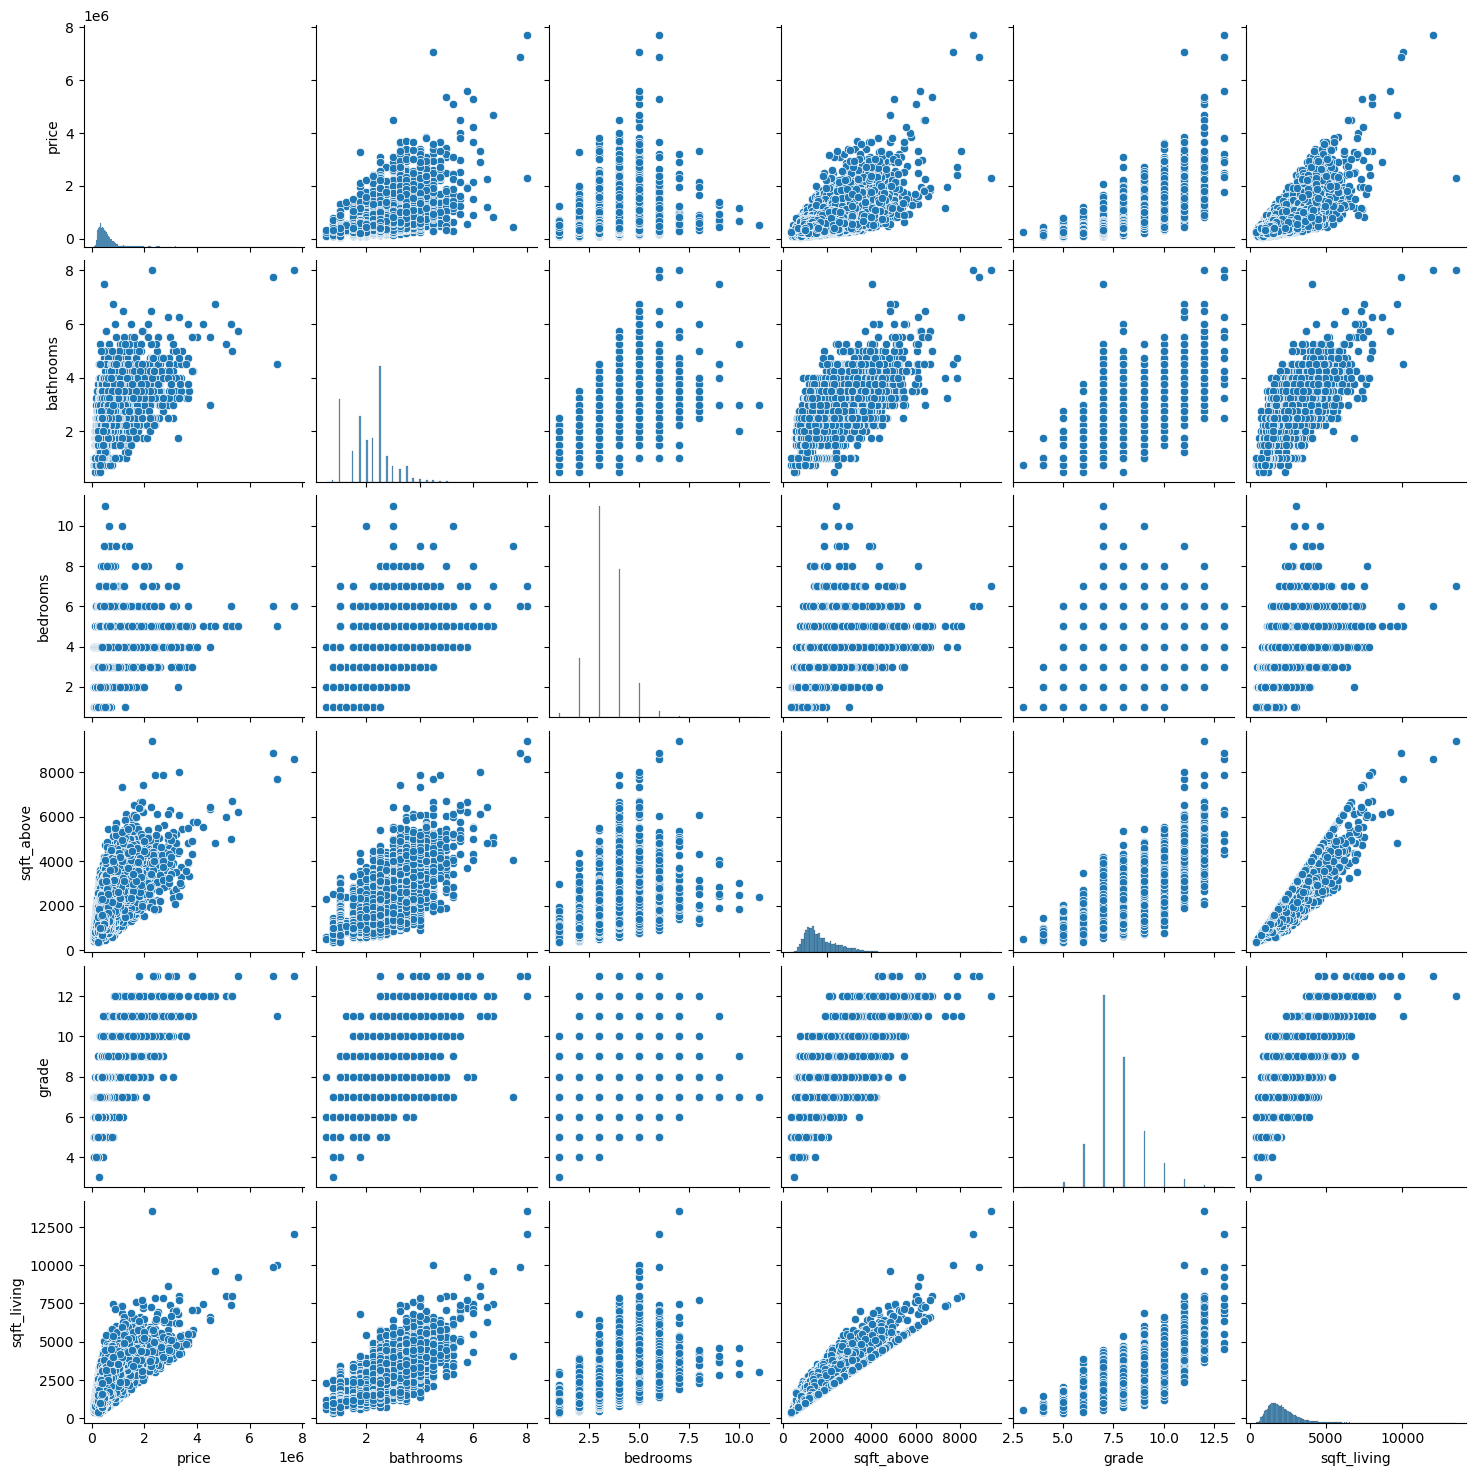

In [ ]:
sns.pairplot(data = df1)

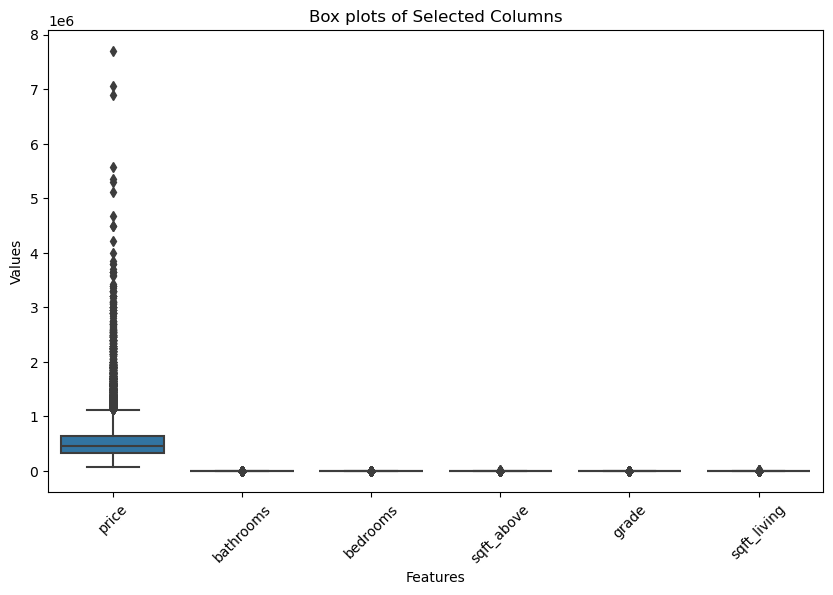

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # Calculate IQR for selected columns
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find outliers
# outliers = ((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)

# # Print indices of outliers
# outlier_indices = df1.index[outliers]

# print(f'Number of outliers: {len(outlier_indices)}')

In [ ]:
# droping all columns with outliers 
# df2 = df1.drop(outlier_indices)

In [ ]:
df3 = df[['sqft_above', 'sqft_living']]

In [ ]:
df4 = df[['bathrooms', 'bedrooms', 'grade']]

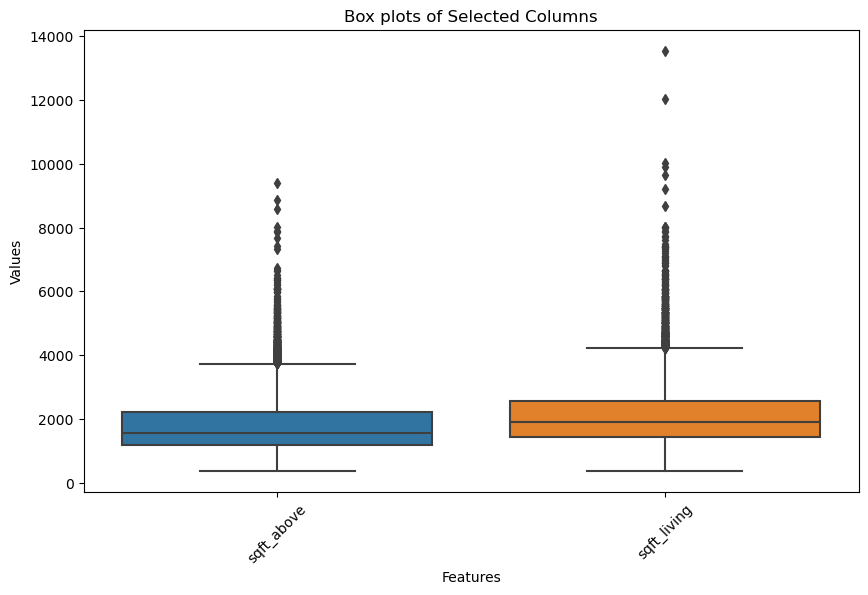

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

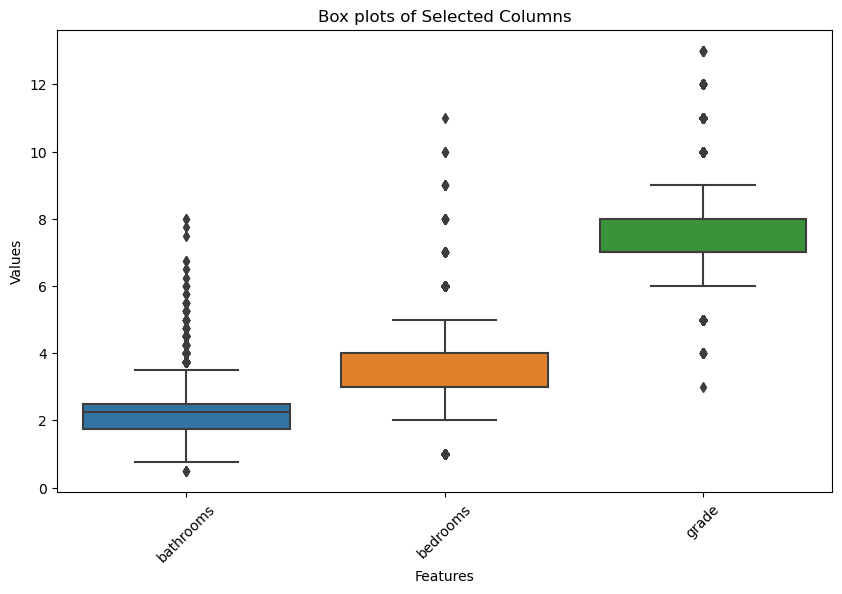

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Analysis 1

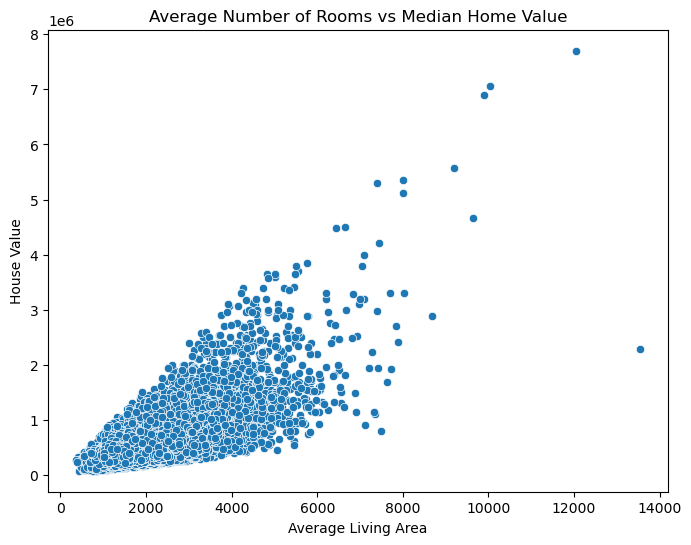

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df1)
plt.title('Average Number of Rooms vs Median Home Value')
plt.xlabel('Average Living Area')
plt.ylabel('House Value')
plt.show()

# Analysis 2

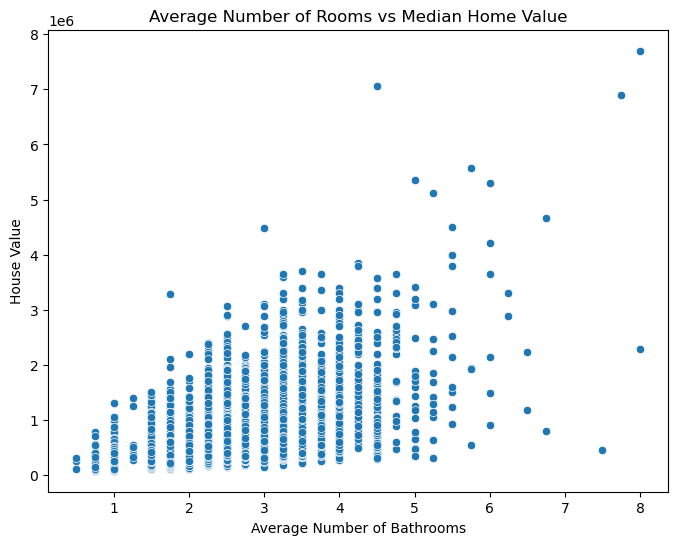

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', data=df1)
plt.title('Average Number of Rooms vs Median Home Value')
plt.xlabel('Average Number of Bathrooms')
plt.ylabel('House Value')
plt.show()

In [ ]:
x = df[['sqft_living', 'grade', 'sqft_above']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a linear model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test_scaled)

pred_df = pd.DataFrame({"true":y_test,"pred":y_pred})
pred_df.head()

,true,pred
3686,132500.0,160184.349645
10247,415000.0,295225.090537
4037,494000.0,449409.950930
3437,355000.0,340399.189623
19291,606000.0,394783.621308


In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 61251115585.27808
Mean Absolute Error: 161354.69079577035
Root Mean Squared Error: 247489.6272276438
R-squared: 0.5324806709143306


In [ ]:

X_1 = df['sqft_living']
X_2 = df['grade']
X_3 = df['sqft_above']

y = df['price']

multiple_formula = 'y ~ X_1 + X_2 + X_3'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:56:57   Log-Likelihood:            -2.9896e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.565e+05   1.36e+04    -48.300      0.0

In [ ]:
correlation_matrix = df[['sqft_living', 'grade', 'sqft_above']].corr()
print(correlation_matrix)

             sqft_living     grade  sqft_above
sqft_living     1.000000  0.762776    0.876448
grade           0.762776  1.000000    0.756069
sqft_above      0.876448  0.756069    1.000000


From the code above it looks like there is multicollinearity between sqft_living and sqft_above.

# Model 2

In [ ]:
x = df[['bedrooms', 'grade', 'sqft_above']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a linear model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test_scaled)

pred_df = pd.DataFrame({"true":y_test,"pred":y_pred})
pred_df.head()

,true,pred
3686,132500.0,164347.641958
10247,415000.0,188606.594345
4037,494000.0,387962.756565
3437,355000.0,312103.410213
19291,606000.0,359363.449692


In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 69565550033.04745
Mean Absolute Error: 172202.41446827358
Root Mean Squared Error: 263752.81995278737
R-squared: 0.4690180094165829


In [ ]:

X_1 = df['bedrooms']
X_2 = df['grade']
X_3 = df['sqft_above']

y = df['price']

multiple_formula = 'y ~ X_1 + X_2 + X_3'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     6389.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:56:57   Log-Likelihood:            -3.0052e+05
No. Observations:               21596   AIC:                         6.010e+05
Df Residuals:                   21592   BIC:                         6.011e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.503e+05   1.54e+04    -55.279      0.0

In [ ]:
correlation_matrix = df[['bedrooms', 'grade', 'sqft_above']].corr()
print(correlation_matrix)

            bedrooms     grade  sqft_above
bedrooms    1.000000  0.366174    0.492543
grade       0.366174  1.000000    0.756069
sqft_above  0.492543  0.756069    1.000000


In [ ]:
# Check for duplicates
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21596, dtype: bool

In [ ]:

print('Hello')

Hello
